# tone cuve

## plotするための処理


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import cv2


# plot histgram 
def plot_grayscale_hist(gray_img, ax, ticks=None):
    
    hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
    hist = np.sqrt(hist)
    ax.plot(hist)

    if ticks:
        ax.set_xticks(ticks)
    ax.set_title('histogram')
    ax.set_xlim([0,256])

    return ax

# plot tone curve 
# I used that I wanted to check the data.
def plot_tonecurve(f,gray_img):
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(2,3)
    x = np.arange(256)

    # center of tone curve
    sns.set_style('darkgrid')
    ax2 = fig.add_subplot(gs[:,1])
    ax2.set_title('Tone Curve')
    ticks = [0,42,84,127,169,211,255]
    ax2.set_xlabel('Input')
    ax2.set_ylabel('Output')
    ax2.set_xticks(ticks)
    ax2.set_yticks(ticks)
    ax2.plot(x, f(x))
    ax2.plot(x, x,linestyle=":",color="m")
    
    
    sns.set_style('ticks')
    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title('input image >>')
    ax1.imshow(gray_img,cmap = "gray")
    
    #delete ticks
    ax1.set_xticks([]), ax1.set_yticks([])  

    
    out_gray_img = np.array([f(a).astype('uint8') for a in gray_img])

    ax3 = fig.add_subplot(gs[0,2])
    ax3.set_title('>> output image')
    ax3.imshow(out_gray_img,cmap = "gray")
    ax3.set_xticks([]), ax3.set_yticks([])

    #histgram
    sns.set_style(style='whitegrid')
    ax4 = fig.add_subplot(gs[1,0])
    ax4 = plot_grayscale_hist(gray_img, ax4, ticks)
    ax5 = fig.add_subplot(gs[1,2])
    ax5 = plot_grayscale_hist(out_gray_img, ax5, ticks)

    plt.show()



## 入力画像

In [3]:
img = cv2.imread('imgs/sunset.jpg',0)

## 折れ線型トーンカーブ

In [4]:
def step_plot(x):
    th1_data=0
    th2_data=80
    delta_x=th2_data-th1_data
    a= 255//delta_x
    _x=np.where(x<th1_data,0,a*(x-th1_data))
    y=np.where(_x>255,255,_x)
    return(y)

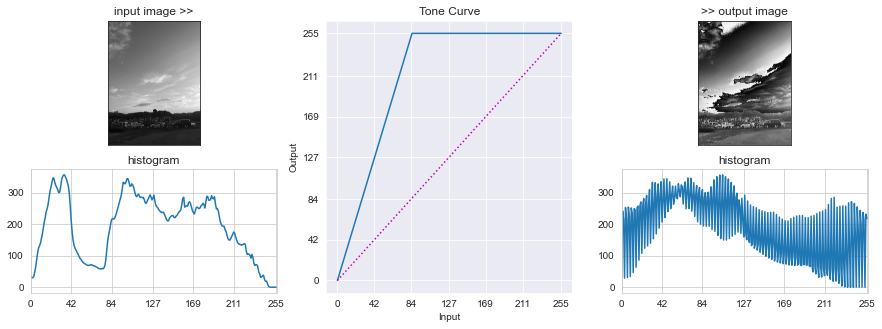

In [5]:
plot_tonecurve(step_plot,img)

## ネガポジ反転


In [6]:
#濃淡を反転した画像を生成するために使用する。
def invert(pixel):
    return 255 - pixel

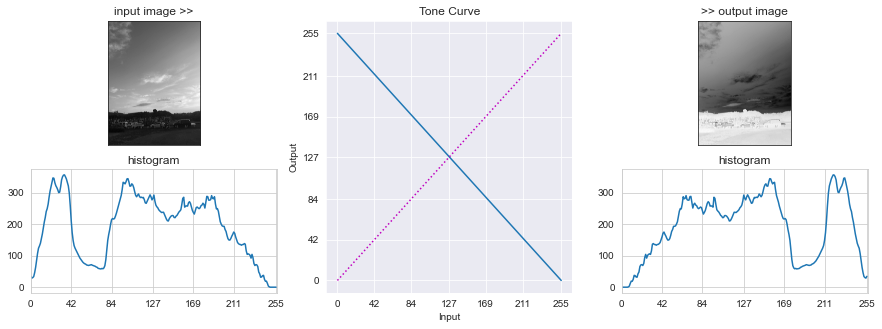

In [7]:
plot_tonecurve(invert,img)

## 2値化

In [8]:
def do_binarization(x):
    th1_data=127
    y=np.where(x<th1_data,0,255)
    return(y)

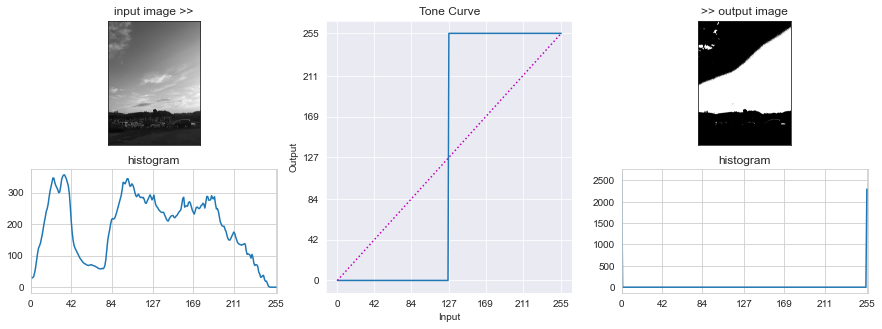

In [9]:
plot_tonecurve(do_binarization,img)

## ソラリゼーション

In [10]:
def solarization_sin(x):
    y = ((-np.cos(0.035*x)+1.0)/2.0)*255

    return y

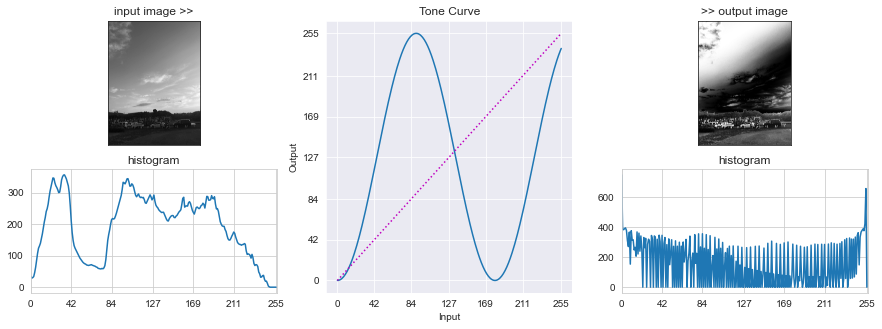

In [11]:
plot_tonecurve(solarization_sin,img)